In [52]:
import numpy as np
import cv2

# variables that you can adjust
driveName = r"\\.\PhysicalDrive1"  # Change this to the correct drive
sectorSize = 512    # The number of bytes in a sector (two hexidecimal numbers is 8 bits, or a byte)
startingSector = 2097152
frameWidth = 384    # The number of pixels in the width (Each pixel is a byte)
frameHeight = 296    # The number of pixels in the height
# numSecRecorded = 150
# fps = 20
numFrames2Read = 320 #17805 # 15 mins. a little less than fps * numSecRecorded.. #1900

f = open(driveName, "rb")  # Open drive
f.seek(startingSector * sectorSize)  # Move to correct sector
writer = cv2.VideoWriter("output.avi", cv2.VideoWriter_fourcc("M", "J", "P", "G"), 20, (frameWidth, frameHeight))

# Debug Variables on the Frame Footer
frameList = [] # 1. Each frame's number
intFrameTimes = [] # 2. When the frame is received from the sensor (in checkVSync, with frame_valid interrupt)
frameLines = [] # 3. The number of lines in each frame
frameDMA = [] # 4. Was DMA transfer completed?
mainFrameTimes = [] # 6. When the frame begins to be written to the SD card
EWLVoltage = [] # 5. EWL Voltage level
mainFullBuffs = [] # 7. frameNumber - numWriteFrame in main 
intFullBuffs = [] # 8. frameNumber - sdImageWriteFrame in checkVSync(frame_valid) interrupt

frameArray = []

for numFrame in range(numFrames2Read):  # Loop through frames
    rawBytes = f.read(frameWidth * frameHeight)
    pixelValues = list(rawBytes)  # Converts from bytes to list. This and the next line can be done more efficiently
    

    frameNumberAr = pixelValues[-4:]
    frameNumber = frameNumberAr[0] + pow(16, 2) * frameNumberAr[1] + pow(16, 4) * frameNumberAr[2] + pow(16, 6) * frameNumberAr[3]   
    intTimestampAr = pixelValues[-8:-4]
    intTimestamp = intTimestampAr[0] + pow(16, 2) * intTimestampAr[1] + pow(16, 4) * intTimestampAr[2] + pow(16, 6) * intTimestampAr[3]
    lineCountAr = pixelValues[-12:-8]
    lineCount = lineCountAr[0] + pow(16, 2) * lineCountAr[1] + pow(16, 4) * lineCountAr[2] + pow(16, 6) * lineCountAr[3]   
    mainTimestampAr = pixelValues[-24:-20]
    mainTimestamp = mainTimestampAr[0] + pow(16, 2) * mainTimestampAr[1] + pow(16, 4) * mainTimestampAr[2] + pow(16, 6) * mainTimestampAr[3]
    voltageStepAr = pixelValues[-20:-16]
    voltageStep = voltageStepAr[0] + pow(16, 2) * voltageStepAr[1] + pow(16, 4) * voltageStepAr[2] + pow(16, 6) * voltageStepAr[3]
    

    frame = np.array(pixelValues)  # Convert to numpy array
    frame = np.reshape(frame, (frameHeight, frameWidth))  # reshape into correct frame dimensions
    
    # cv2.imshow("sdCard Video", frame / 255.0)  # Display frame
    # cv2.waitKey(0)  # Wait for button press to show next frame. Can use time.sleep(n) to increment frame every 'n' seconds
    # print(rawBytes.hex())

    # This chunk is just used to get things actually working. The proper way is to figure out how to write grayscale images to avi files
    tempFrame = np.zeros((frameHeight, frameWidth, 3))
    tempFrame[:, :, 0] = frame
    tempFrame[:, :, 1] = frame
    tempFrame[:, :, 2] = frame
    writer.write(tempFrame.astype("uint8"))
    
    frameList.append(frameNumber) #1
    intFrameTimes.append(intTimestamp) #2
    frameLines.append(lineCount) #3
    frameDMA.append(pixelValues[-16]) #4
    EWLVoltage.append(voltageStep) #5
    mainFrameTimes.append(mainTimestamp) #6
    mainFullBuffs.append(pixelValues[-28]) #7
    intFullBuffs.append(pixelValues[-32]) #8
    
    print("Frame Number: ", frameNumber, "\t", 
          "Interrupt Timestamp: ", intTimestamp, "\t", 
          "Main Timestamp: ", mainTimestamp, "\t",
          "EWL Voltage: ", voltageStep, "\t",
#          "Main Buffers Ahead: ", pixelValues[-28], "\t",
#          "Interrupt Buffers Ahead: ", pixelValues[-32], "\t",
          "\n")
    
    frameArray.append(frame)
f.close()
writer.release()

Frame Number:  0 	 Interrupt Timestamp:  90 	 Main Timestamp:  90 	 EWL Voltage:  16 	 

Frame Number:  1 	 Interrupt Timestamp:  140 	 Main Timestamp:  140 	 EWL Voltage:  16 	 

Frame Number:  2 	 Interrupt Timestamp:  191 	 Main Timestamp:  191 	 EWL Voltage:  16 	 

Frame Number:  3 	 Interrupt Timestamp:  241 	 Main Timestamp:  241 	 EWL Voltage:  16 	 

Frame Number:  4 	 Interrupt Timestamp:  292 	 Main Timestamp:  292 	 EWL Voltage:  16 	 

Frame Number:  5 	 Interrupt Timestamp:  342 	 Main Timestamp:  342 	 EWL Voltage:  16 	 

Frame Number:  6 	 Interrupt Timestamp:  393 	 Main Timestamp:  393 	 EWL Voltage:  16 	 

Frame Number:  7 	 Interrupt Timestamp:  443 	 Main Timestamp:  443 	 EWL Voltage:  16 	 

Frame Number:  8 	 Interrupt Timestamp:  494 	 Main Timestamp:  494 	 EWL Voltage:  16 	 

Frame Number:  9 	 Interrupt Timestamp:  544 	 Main Timestamp:  544 	 EWL Voltage:  16 	 

Frame Number:  10 	 Interrupt Timestamp:  594 	 Main Timestamp:  594 	 EWL Voltage:  16 	 



Frame Number:  94 	 Interrupt Timestamp:  4831 	 Main Timestamp:  4832 	 EWL Voltage:  80 	 

Frame Number:  95 	 Interrupt Timestamp:  4882 	 Main Timestamp:  4882 	 EWL Voltage:  80 	 

Frame Number:  96 	 Interrupt Timestamp:  4932 	 Main Timestamp:  4932 	 EWL Voltage:  80 	 

Frame Number:  97 	 Interrupt Timestamp:  4983 	 Main Timestamp:  4983 	 EWL Voltage:  80 	 

Frame Number:  98 	 Interrupt Timestamp:  5033 	 Main Timestamp:  5033 	 EWL Voltage:  80 	 

Frame Number:  99 	 Interrupt Timestamp:  5084 	 Main Timestamp:  5084 	 EWL Voltage:  80 	 

Frame Number:  100 	 Interrupt Timestamp:  5134 	 Main Timestamp:  5134 	 EWL Voltage:  96 	 

Frame Number:  101 	 Interrupt Timestamp:  5185 	 Main Timestamp:  5185 	 EWL Voltage:  96 	 

Frame Number:  102 	 Interrupt Timestamp:  5235 	 Main Timestamp:  5235 	 EWL Voltage:  96 	 

Frame Number:  103 	 Interrupt Timestamp:  5285 	 Main Timestamp:  5285 	 EWL Voltage:  96 	 

Frame Number:  104 	 Interrupt Timestamp:  5336 	 Main T

Frame Number:  181 	 Interrupt Timestamp:  9220 	 Main Timestamp:  9220 	 EWL Voltage:  160 	 

Frame Number:  182 	 Interrupt Timestamp:  9270 	 Main Timestamp:  9270 	 EWL Voltage:  160 	 

Frame Number:  183 	 Interrupt Timestamp:  9321 	 Main Timestamp:  9321 	 EWL Voltage:  160 	 

Frame Number:  184 	 Interrupt Timestamp:  9371 	 Main Timestamp:  9371 	 EWL Voltage:  160 	 

Frame Number:  185 	 Interrupt Timestamp:  9422 	 Main Timestamp:  9422 	 EWL Voltage:  160 	 

Frame Number:  186 	 Interrupt Timestamp:  9472 	 Main Timestamp:  9472 	 EWL Voltage:  160 	 

Frame Number:  187 	 Interrupt Timestamp:  9523 	 Main Timestamp:  9523 	 EWL Voltage:  160 	 

Frame Number:  188 	 Interrupt Timestamp:  9573 	 Main Timestamp:  9573 	 EWL Voltage:  160 	 

Frame Number:  189 	 Interrupt Timestamp:  9623 	 Main Timestamp:  9623 	 EWL Voltage:  160 	 

Frame Number:  190 	 Interrupt Timestamp:  9674 	 Main Timestamp:  9674 	 EWL Voltage:  160 	 

Frame Number:  191 	 Interrupt Timestamp

Frame Number:  270 	 Interrupt Timestamp:  13709 	 Main Timestamp:  13709 	 EWL Voltage:  224 	 

Frame Number:  271 	 Interrupt Timestamp:  13760 	 Main Timestamp:  13760 	 EWL Voltage:  224 	 

Frame Number:  272 	 Interrupt Timestamp:  13810 	 Main Timestamp:  13810 	 EWL Voltage:  224 	 

Frame Number:  273 	 Interrupt Timestamp:  13860 	 Main Timestamp:  13860 	 EWL Voltage:  224 	 

Frame Number:  274 	 Interrupt Timestamp:  13911 	 Main Timestamp:  13911 	 EWL Voltage:  224 	 

Frame Number:  275 	 Interrupt Timestamp:  13961 	 Main Timestamp:  13961 	 EWL Voltage:  224 	 

Frame Number:  276 	 Interrupt Timestamp:  14012 	 Main Timestamp:  14012 	 EWL Voltage:  224 	 

Frame Number:  277 	 Interrupt Timestamp:  14062 	 Main Timestamp:  14062 	 EWL Voltage:  224 	 

Frame Number:  278 	 Interrupt Timestamp:  14113 	 Main Timestamp:  14113 	 EWL Voltage:  224 	 

Frame Number:  279 	 Interrupt Timestamp:  14163 	 Main Timestamp:  14163 	 EWL Voltage:  224 	 

Frame Number:  280 	

In [2]:
frameList = frameList[:17805] # 1. Each frame's number
intFrameTimes = intFrameTimes[:17805] # 2. When the frame is received from the sensor (in checkVSync, with frame_valid interrupt)
frameLines = frameLines[:17805] # 3. The number of lines in each frame
frameDMA = frameDMA[:17805] # 4. Was DMA transfer completed?
frameNxtBuff = frameNxtBuff[:17805] # 5. This one might actually need to be written in main.. actually it does.
mainFrameTimes = mainFrameTimes[:17805] # 6. When the frame begins to be written to the SD card
mainFullBuffs = mainFullBuffs[:17805] # 7. frameNumber - numWriteFrame in main 
intFullBuffs = intFullBuffs[:17805] # 8. frameNumber - sdImageWriteFrame in checkVSync(frame_valid) interrupt

In [12]:
import matplotlib.pyplot as plt

# There was a discontinuity because of a past, longer recording session
# Plot of all frame timestamps

plt.plot(intFrameTimes[:17805])
plt.plot(mainFrameTimes[:17805])

In [39]:
# Check each interframe length

intFrameLengths = np.diff(intFrameTimes)
mainFrameLengths = np.diff(mainFrameTimes)

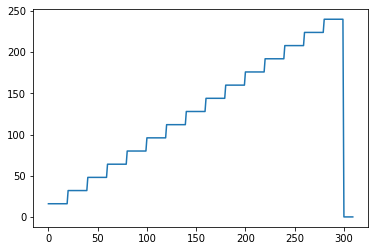

In [44]:
plt.plot(EWLVoltage[:310])

(array([   0., 1598.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
 array([ 25,  50,  75, 100, 125, 150, 175, 200, 225, 250]),
 <a list of 9 Patch objects>)

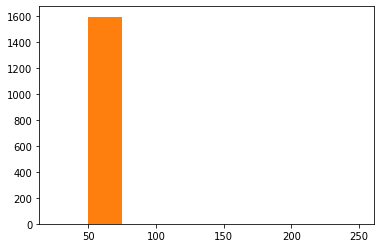

In [37]:
# Histogram of interframe lengths


#plt.hist(frameLengths, bins='auto')
# plt.hist(frameLengths, bins=[-3400, -3000, -2600, -2200, -1800, -1400, -1000, -600, -200, 200, 600, 1000])
plt.hist(intFrameLengths, bins=[25, 50, 75, 100, 125, 150, 175, 200, 225, 250])
plt.hist(mainFrameLengths, bins=[25, 50, 75, 100, 125, 150, 175, 200, 225, 250])

# plt.hist(frameLengths, bins=[45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


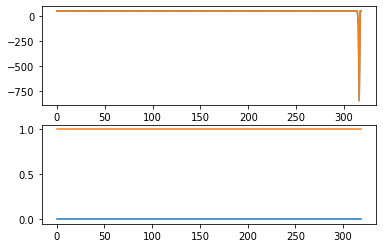

In [42]:
# figure = plt.subplots()

# Plot of all framelengths
plt.subplot(2, 1, 1)
plt.plot(intFrameLengths)

plt.subplot(2, 1, 2)
plt.plot(intFullBuffs)

plt.subplot(2, 1, 1)
plt.plot(mainFrameLengths)

plt.subplot(2, 1, 2)
plt.plot(mainFullBuffs)

# Zoom into where short/long interframe lengths are
# plt.subplot(4, 1, 3)
# plt.plot(frameLengths[45:105])

# plt.subplot(4, 1, 4)
# plt.plot(waitingFrames[45:105])

# figure.tight_layout()
# plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


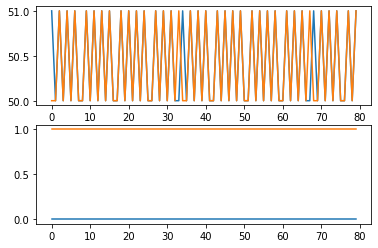

In [41]:
# Zoom into where short/long interframe lengths are
plt.subplot(2, 1, 1)
plt.plot(intFrameLengths[0:80])

plt.subplot(2, 1, 2)
plt.plot(intFullBuffs[0:80])

plt.subplot(2, 1, 1)
plt.plot(mainFrameLengths[0:80])

plt.subplot(2, 1, 2)
plt.plot(mainFullBuffs[0:80])

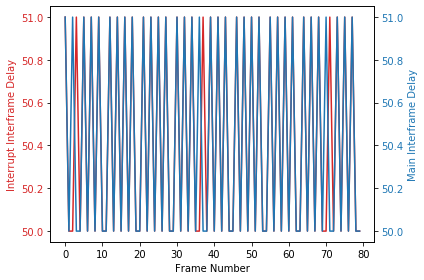

In [9]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Frame Number')
ax1.set_ylabel('Interrupt Interframe Delay', color=color)
ax1.plot(intFrameLengths[0:80], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Main Interframe Delay', color=color)  # we already handled the x-label with ax1
ax2.plot(mainFrameLengths[0:80], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [10]:
print(mainFrameLengths[-20:], "\n", sorted(intFrameLengths)[-10:])

[51 50 51 50 51 50 51 50 50 51 50 51 50 51 50 51 50 50 51 50] 
 [101, 101, 101, 101, 101, 101, 151, 151, 151, 152]


In [17]:
# Check if other interrupts are working fine


print(len(frameList), max(np.diff(frameList)), min(np.diff(frameList)), frameList.count(0), frameList.index(0))
print(len(frameLines), max(frameLines), min(frameLines))
print(len(frameDMA), max(frameDMA), min(frameDMA))

17805 1 1 1 0
17805 296 296
17805 1 1


In [18]:
# Where are the wrong interframe time lengths?

frameTimeDict = {i + 1: frameLengths[i] for i in range(len(frameLengths))} 

longFrameDict = {k: v for k, v in frameTimeDict.items() if (v >51)}
shortFrameDict = {k: v for k, v in frameTimeDict.items() if (v < 50)}
print(sorted(frameLengths))
print(shortFrameDict, longFrameDict, len(longFrameDict) + len(shortFrameDict))

NameError: name 'frameLengths' is not defined

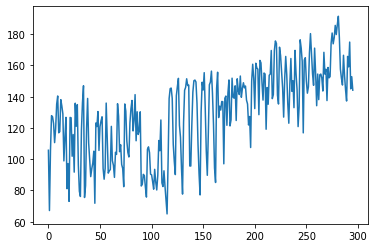

In [23]:
#Begin looking at each frame

frameRowMean = np.mean(frameArray[51], axis=1)
plt.plot(frameRowMean)

In [89]:
# I could do either minimum row or maximum-difference-from-adjacent row and track them through frames.
# Throw out the outliers?
numPlots = 3
darkRowProg = {}
for i in range(numFrame + 1):
    frameRowMean = np.mean(frameArray[i],axis=1) # a list of each row's mean pixel value
    rowMeanDict = {i : frameRowMean[i] for i in range(0, len(frameRowMean))} # a dictionary with row:mean
    threeDarkRows = sorted(rowMeanDict, key=rowMeanDict.get, reverse=False)[:numPlots] # sorted list of three darkest rows
    darkRowProg[i] = threeDarkRows
    
    
#    darkRowVal = {i : rowMeanDict[i] for i in threeDarkRows} # sorted dict of darkest rows/their vals
#    print(darkRowVal)

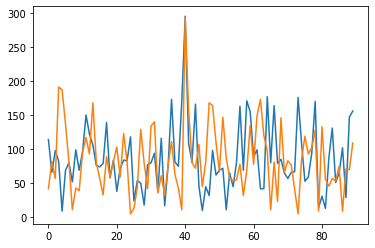

In [90]:
dark1Row = [i[0] for i in darkRowProg.values()]
dark2Row = [i[1] for i in darkRowProg.values()]
dark3Row = [i[2] for i in darkRowProg.values()]
plt.plot(list(darkRowProg.keys()), dark1Row)
plt.plot(list(darkRowProg.keys()), dark2Row)
# plt.plot(list(darkRowProg.keys()), dark3Row)
plt.show()

In [91]:
# Let's try maximum-difference
numPlots = 3
dipRowProg = {}
for i in range(numFrame + 1):
    frameRowMean = np.mean(frameArray[i],axis=1) # a list of each row's mean pixel value
    dipRowMean = np.diff(frameRowMean)
    rowDipDict = {i : dipRowMean[i] for i in range(0, len(dipRowMean))}
    threeDipRows = sorted(rowDipDict, key=rowDipDict.get, reverse=False)[:numPlots] # sorted list of three largest dips
    dipRowProg[i] = threeDipRows

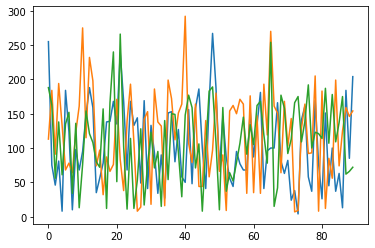

In [92]:
deep1Row = [i[0] for i in dipRowProg.values()]
deep2Row = [i[1] for i in dipRowProg.values()]
deep3Row = [i[2] for i in dipRowProg.values()]
plt.plot(list(darkRowProg.keys()), deep1Row)
plt.plot(list(darkRowProg.keys()), deep2Row)
plt.plot(list(darkRowProg.keys()), deep3Row)
plt.show()